**ASSIGNMENT: INITIAL CHANGES**
---

**CHANGE 1: Activation After Batch Normalization**
- Base Model: 99.47
- Activation After Batch Normalization: 99.53 (Run1) & 99.42 (Run2)

**_Result: No definitive increase_**


**CHANGE 2: Adding L2 Regularization**
- Base Model: 99.47
- After Regularizatin: 98.01 (Lambda=0.01) & 98.92 (Lambda=0.001) & 99.16 (Lambda=0.0005)
- [Last Lambda value based on this website article](https://machinelearningmastery.com/how-to-reduce-overfitting-in-deep-learning-with-weight-regularization/)

**_Result: Decrease in Accuracy_** - _Possibly due to artificial increase in loss function??_


**CHANGE 3: Image Normalization**
- Base Model: 99.47
- After Image Normalization: 98.35

**_Result: Further Decreasse_** _BECAUSE THE NORMALIZATION OF 60K images will not be the same as 10K IMAGES ??!!_

---------------------------------------------------------------------------------------------------------------------------------------------------

**ASSIGNMENT: FINAL STEPS**
---
Misclassfied Images - Still NOT DONE

In [1]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.regularizers import l2
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


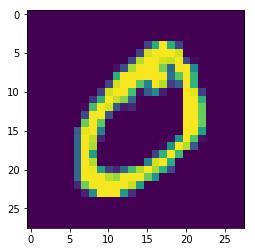

In [3]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [7]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [8]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(16, 3, 3, kernel_regularizer=l2(0.0005), input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(32, 3, 3, kernel_regularizer=l2(0.0005))) #24
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1, kernel_regularizer=l2(0.0005), activation='relu')) #22

model.add(MaxPooling2D(pool_size=(2, 2)))#11

model.add(Convolution2D(16, 3, 3, kernel_regularizer=l2(0.0005)))#9
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, kernel_regularizer=l2(0.0005)))#7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, kernel_regularizer=l2(0.0005)))#5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, kernel_regularizer=l2(0.0005)))#3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(10, 4, 4, kernel_regularizer=l2(0.0005)))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg..., input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_regularizer=<keras.reg...)`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), kernel_regularizer=<keras.reg..., activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launch

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 32)        0         
__________

In [9]:
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

checkpointfilepath = "eva_assignment5.hdf5"
checkpoint = ModelCheckpoint(checkpointfilepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])


datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
datagen.fit(X_train)
datagen.fit(X_test)
train_iterator = datagen.flow(X_train, Y_train, batch_size=128, shuffle=False)
test_iterator = datagen.flow(X_test, Y_test, batch_size=128, shuffle=False)

#Train Model
model.fit_generator(train_iterator, steps_per_epoch=len(train_iterator), epochs=40, verbose=1, validation_data=(X_test, Y_test), callbacks=[checkpoint])




#model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[checkpoint])

Instructions for updating:
Use tf.cast instead.
Epoch 1/40
469/469 [==============================] - 12s 26ms/step - loss: 0.5832 - acc: 0.8523 - val_loss: 2.1020 - val_acc: 0.3246

Epoch 00001: val_acc improved from -inf to 0.32460, saving model to eva_assignment5.hdf5
Epoch 2/40
469/469 [==============================] - 8s 17ms/step - loss: 0.2831 - acc: 0.9289 - val_loss: 2.0169 - val_acc: 0.3144

Epoch 00002: val_acc did not improve from 0.32460
Epoch 3/40
469/469 [==============================] - 8s 17ms/step - loss: 0.2233 - acc: 0.9416 - val_loss: 1.2697 - val_acc: 0.5561

Epoch 00003: val_acc improved from 0.32460 to 0.55610, saving model to eva_assignment5.hdf5
Epoch 4/40
469/469 [==============================] - 8s 17ms/step - loss: 0.1991 - acc: 0.9452 - val_loss: 1.1413 - val_acc: 0.6147

Epoch 00004: val_acc improved from 0.55610 to 0.61470, saving model to eva_assignment5.hdf5
Epoch 5/40
469/469 [==============================] - 8s 17ms/step - loss: 0.1852 - acc: 0.9

In [10]:

model.load_weights(checkpointfilepath)

_, acc = model.evaluate_generator(test_iterator, steps=len(test_iterator), verbose=0)

#score = model.evaluate(X_test, Y_test, verbose=0)
print(_, acc)

0.09896240748763084 0.9835


(10000, 10) (10000, 10)
(10000,) [ 0 -1  0  0  0]
(25,) [ 1  7  8 18 20]


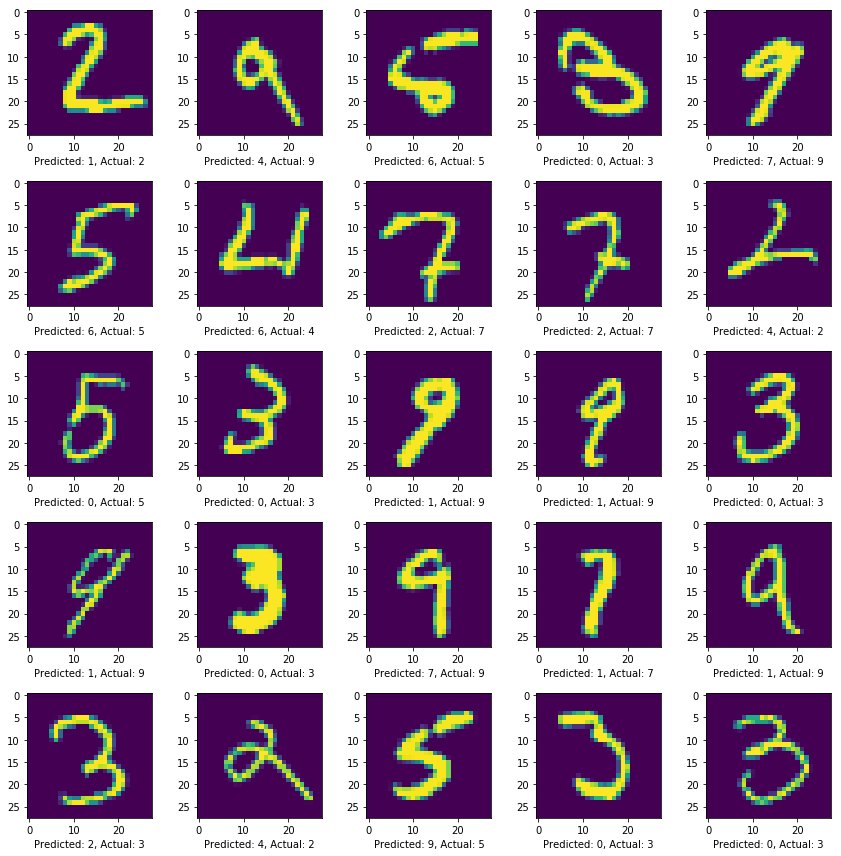

In [11]:
y_pred = model.predict(X_test)
print(y_pred.shape, Y_test.shape)

differences = np.argmax(y_pred, axis=1) - np.argmax(Y_test, axis=1)
print(differences.shape, differences[:5])

counter = 0
ind = 0
misclassified_indices = []
for k in differences:
  if k != 0 and counter<25:
    misclassified_indices.append(ind)
    counter += 1
  ind += 1

misclassified_indices = np.array(misclassified_indices)
print(misclassified_indices.shape, misclassified_indices[:5])

plt.figure(figsize = (12, 12))
pos = [[x, y] for x in range(1,6) for y in range(1,6)]
tmp = 1
for l in pos:
  l.append(tmp)
  tmp += 1

(again_xtrain, again_ytrain), (again_xtest, again_ytest) = mnist.load_data()
pos_counter = 0
for x in pos:
  index = misclassified_indices[pos_counter]
  plt.subplot(5,5,x[2])
  plt.xlabel("Predicted: "+str(np.argmax(y_pred[index])) + ", Actual: "+str(again_ytest[index]))
  plt.tight_layout()
  plt.imshow(again_xtest[index])
  pos_counter += 1

In [12]:
print(np.argmax(y_pred[:5], axis=1), again_ytest[:5])

[7 1 1 0 4] [7 2 1 0 4]


In [13]:
print()